In [30]:
!wget https://judge.nitro-ai.org/download/cram-school/cram-school-practice/2/train_data.csv
!wget https://judge.nitro-ai.org/download/cram-school/cram-school-practice/2/test_data.csv

--2025-08-28 17:39:11--  https://judge.nitro-ai.org/download/cram-school/cram-school-practice/2/train_data.csv
Resolving judge.nitro-ai.org (judge.nitro-ai.org)... 172.67.198.247, 104.21.68.218, 2606:4700:3037::ac43:c6f7, ...
Connecting to judge.nitro-ai.org (judge.nitro-ai.org)|172.67.198.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘train_data.csv.1’

train_data.csv.1        [    <=>             ]   3.65M  3.79MB/s               ^C
--2025-08-28 17:39:17--  https://judge.nitro-ai.org/download/cram-school/cram-school-practice/2/test_data.csv
Resolving judge.nitro-ai.org (judge.nitro-ai.org)... 172.67.198.247, 104.21.68.218, 2606:4700:3037::ac43:c6f7, ...
Connecting to judge.nitro-ai.org (judge.nitro-ai.org)|172.67.198.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘test_data.csv.1’

test_data.csv.1         [               <=

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np

df_train = pd.read_csv("train_data.csv",  dtype={"id": str})
df_test = pd.read_csv("test_data.csv",  dtype={"id": str})

df_train["pixels"] = df_train["pixels"].apply(eval)
df_test["pixels"]  = df_test["pixels"].apply(eval)

print(df_train.columns)
print(df_test.columns)

Index(['id', 'pixels', 'class'], dtype='object')
Index(['id', 'pixels'], dtype='object')


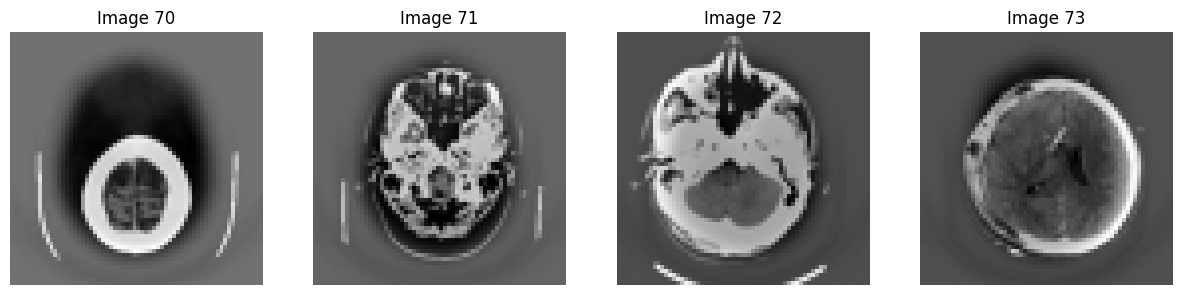

In [ ]:
start = 69
images = 4
plt.figure(figsize=(5 * (images - 1), 5))

for i in range(start, start + images):
    pixels = df_train["pixels"].iloc[i]
    pixels = np.array(pixels)

    image = pixels.reshape(64, 64)

    plt.subplot(1, 4, i - start + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Image {i + 1}")
    plt.axis('off')

plt.show()

In [31]:
import pandas as pd
import ast
import numpy as np

rows = []

def subtask1(csv_path):
    df = pd.read_csv(csv_path)
    df['pixels'] = df['pixels'].apply(ast.literal_eval)

    image_ids = df['id'].tolist()
    image_vectors = np.array(df['pixels'].to_list(), dtype=float)

    mean_vector = np.mean(image_vectors, axis=0)
    centered_vectors = image_vectors - mean_vector

    for img_id, vec in zip(image_ids, centered_vectors):
        vec_str = str(np.array(vec))
        rows.append((1, img_id, vec_str))

    return rows

subtask1_rows = subtask1("train_data.csv")
print(rows[0])

(1, 15002, '[-0.10046729 -0.10046729 -0.10046729 ... -0.57476636 -0.66238318\n -0.43457944]')


In [ ]:
# Prection model - Subtask 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


x_train = np.vstack(df_train["pixels"].values)
x_test = np.vstack(df_test["pixels"].values)

y_train = df_train["class"]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=69)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [50, 100, 200, 300, 600],
    'max_depth' : [None, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}
model2 = RandomForestClassifier(random_state = 69)
grid = GridSearchCV(param_grid = param,estimator = model2, n_jobs=-1, cv=5, verbose=2)
grid.fit(x_train, y_train)
model = grid.best_estimator_

y_pred = model.predict(x_val_scaled)
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"f1 Score: {f1}")

y_pred_test = model.predict(x_test)

subtask2_rows = []
for id_, pred in zip(df_test["id"], y_pred_test):
    subtask2_rows.append((2, id_, pred))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

f1 Score: 0.7548541897379106


In [32]:
# === Final submission
submission_rows = subtask1_rows + subtask2_rows
df_submission = pd.DataFrame(submission_rows, columns=["subtaskID", "datapointID", "answer"])
df_submission.to_csv("submission.csv", index=False)

In [34]:
!head -n 10 submission.csv
!tail -n 10 submission.csv

print(df_submission.iloc[800:810])

subtaskID,datapointID,answer
1,15002,"[-0.10046729 -0.10046729 -0.10046729 ... -0.57476636 -0.66238318
 -0.43457944]"
1,15003,"[-0.10046729 -0.10046729 -0.10046729 ... -0.57476636 -0.66238318
 -0.43457944]"
1,15006,"[-0.10046729 -0.10046729 -0.10046729 ... -0.57476636 -0.66238318
 -0.43457944]"
1,15010,"[-0.10046729 -0.10046729 -0.10046729 ... -0.57476636 -0.66238318
 -0.43457944]"
1,15011,"[-0.10046729 -0.10046729 -0.10046729 ... -0.57476636 -0.66238318
2,016864,0
2,015501,0
2,015748,0
2,015020,0
2,015712,0
2,015552,0
2,016399,1
2,016470,1
2,016902,0
2,015682,0
     subtaskID datapointID                                             answer
800          1       16872  [-0.10046729 -0.10046729 -0.10046729 ... -0.57...
801          1       16873  [-0.10046729 -0.10046729 -0.10046729 ... -0.57...
802          1       16874  [-0.10046729 -0.10046729 -0.10046729 ... -0.57...
803          1       16875  [-0.10046729 -0.10046729 -0.10046729 ... -0.57...
804          1       16876  [-0.10046729 